In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

from helpers import *

In [2]:
# Setting the paths to the data folders
DATA_FOLDER = "../Data/"
CMU_PATH = DATA_FOLDER + "MovieSummaries/"
IMDB_PATH = DATA_FOLDER + "IMDb/"
OSCARS_PATH = DATA_FOLDER + "Oscars/"

In [3]:
actors = pd.read_csv(
    DATA_FOLDER + "actors.csv",
    converters={
        "fbID": parse_list_actors,
        "ageAtMovieRelease": parse_dict,
        "category": parse_dict,
        "winner": parse_dict,
    },
)
movies = pd.read_csv(
    DATA_FOLDER + "movies.csv",
    converters={
        "languages": parse_list,
        "countries": parse_list,
        "genresCmu": parse_list,
    },
)

actors.reset_index(inplace=True)

actors

,index,fbActorID,actorName,actorGender,actorDOB,actorHeight,actorEthnicity,yearOfBirth,fbID,ageAtMovieRelease,category,winner,numMovies
0,0,/m/010p3,Adam Carolla,M,1964-05-27,1.880,NaN,1964.0,"[/m/03qk61v, /m/047dv64, /m/051wrdv, /m/06c5z_...","{'/m/03qk61v': 44.0, '/m/051wrdv': 35.0, '/m/0...",NaN,NaN,11
1,1,/m/010q36,Fred Rogers,M,1928-03-20,NaN,NaN,1928.0,[/m/033pf1],{'/m/033pf1': 67.0},NaN,NaN,1
2,2,/m/010wx,Aria Giovanni,F,1977-11-03,1.680,NaN,1977.0,[/m/07gx0c],{'/m/07gx0c': 25.0},NaN,NaN,1
3,3,/m/010xjr,Richard Harris,M,1930-10-01,1.850,Irish people,1930.0,"[/m/015gl2, /m/0273r02, /m/02qf1bq, /m/02qf7sl...","{'/m/0273r02': 68.0, '/m/02qf1bq': 36.0, '/m/0...",{'/m/015gl2': 'ACTOR'},{'/m/015gl2': False},52
4,4,/m/0112yl,Toshiro Mifune,M,1920-04-01,1.740,NaN,1920.0,"[/m/018lr7, /m/019npw, /m/01j5x_, /m/01nv95, /...","{'/m/018lr7': 41.0, '/m/019npw': 30.0, '/m/01n...",NaN,NaN,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135417,135417,/m/0z58,Ardal O'Hanlon,M,1965-10-08,NaN,NaN,1965.0,[/m/027cvd8],NaN,NaN,NaN,1
135418,135418,/m/0z9q0,"José Luis Rodríguez ""El Puma""",M,1943-01-14,NaN,NaN,1943.0,[/m/0gls5qd],{'/m/0gls5qd': 69.0},NaN,NaN,1
135419,135419,/m/0zcb7,Marcus Giamatti,M,1961-10-03,1.850,NaN,1961.0,"[/m/02drs7, /m/03b1xl, /m/047fs6w, /m/080kkcx,...","{'/m/02drs7': 40.0, '/m/03b1xl': 29.0, '/m/047...",NaN,NaN,6
135420,135420,/m/0zcbl,Paul Giamatti,M,1967-06-06,1.740,NaN,1967.0,"[/m/01510v, /m/01hv3t, /m/01pgnr, /m/024tb7, /...","{'/m/01510v': 31.0, '/m/01hv3t': 30.0, '/m/01p...",{'/m/050gkf': 'ACTOR IN A SUPPORTING ROLE'},{'/m/050gkf': False},54


In [4]:
def build_representation(ages):
    rep = np.zeros(20)

    ages = ages - np.sum(ages) / len(ages) + 100

    for a in ages:
        #assert(a > 0 and a < 110)
        a10 = a / 10
        i = int(a10)

        rep[i] += a10 - i
        rep[i+1] += 1 - (a10 - i)

    return rep / np.linalg.norm(rep)

In [5]:
def derivate(rep):
    der = np.zeros(len(rep) - 1)

    for i in range(len(rep) - 1):
        der[i] = rep[i+1] - rep[i]
    
    return der

In [6]:
representations = []

for index, actor in actors.iterrows():
    if type(actor.ageAtMovieRelease) == float: # Remove NaN
        continue
    ages = list(actor.ageAtMovieRelease.values())

    if len(ages) < 10:
        continue

    rep = build_representation(ages)

    representations.append(rep)

representations = np.array(representations)

In [7]:
derivatives = [derivate(rep) for rep in representations]

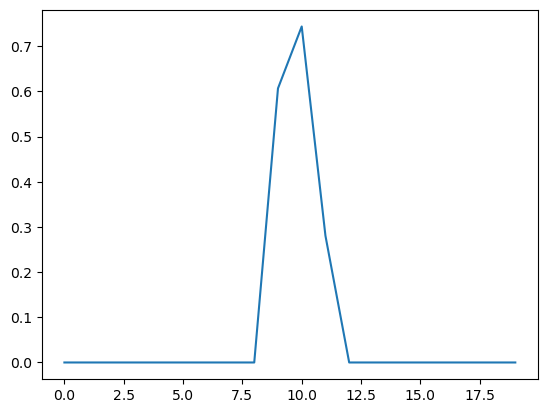

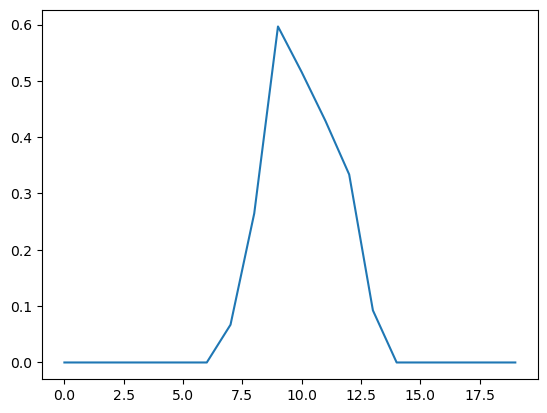

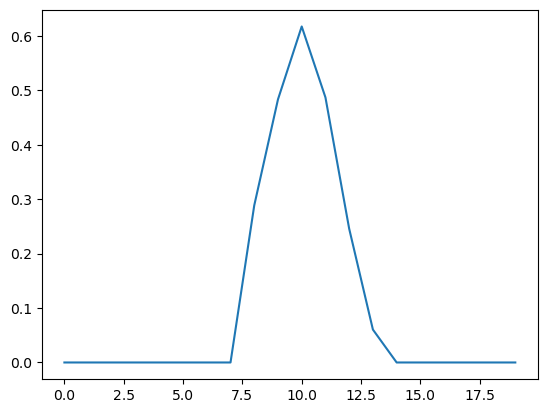

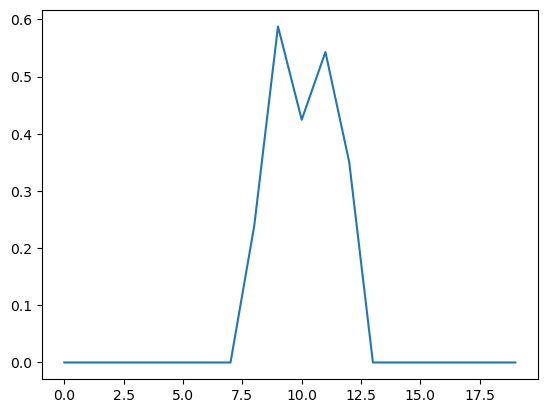

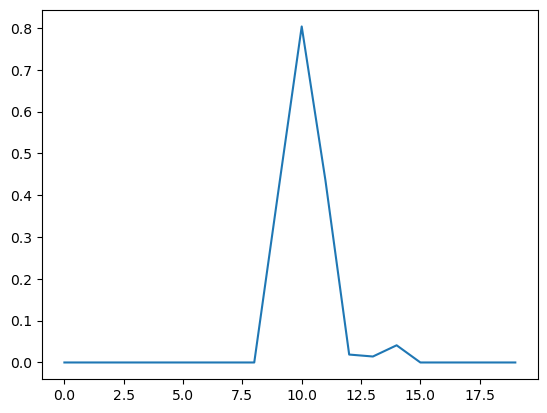

In [8]:
def show_representation(rep):
    plt.figure()
    plt.plot(rep)
    plt.show()

for i in range(5):
    show_representation(representations[i])

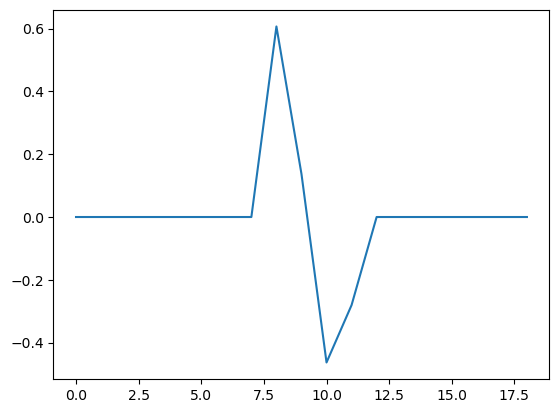

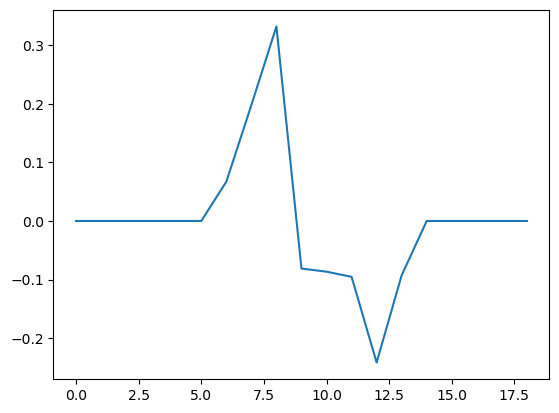

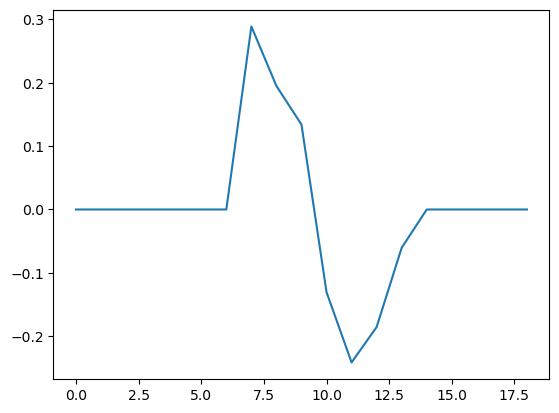

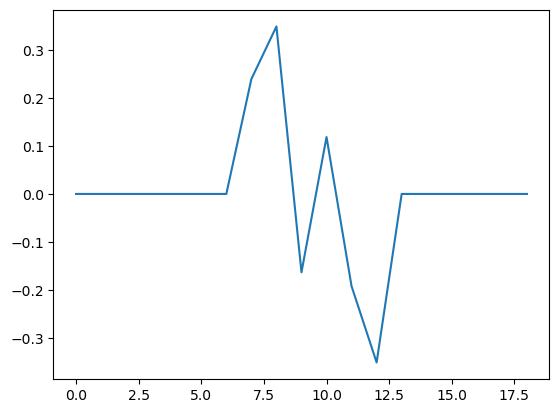

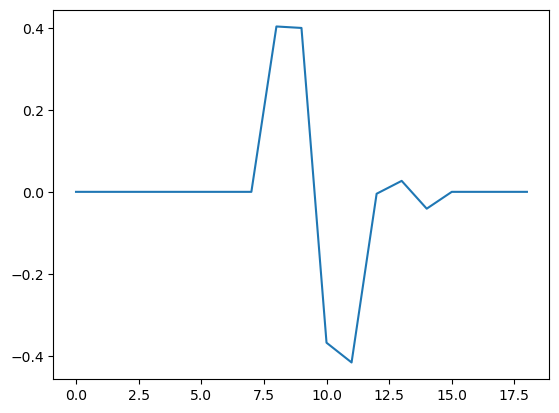

In [9]:
for i in range(5):
    show_representation(derivatives[i])

/home/adrien/anaconda3/envs/epfl-ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


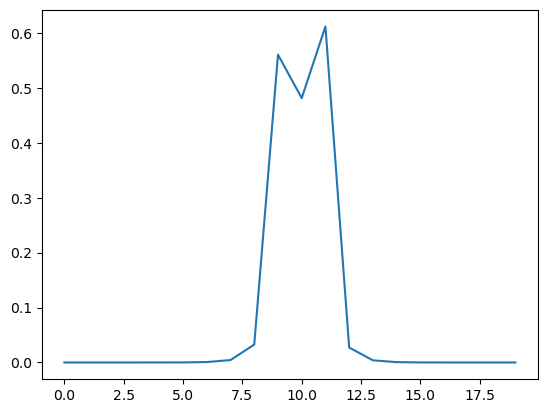

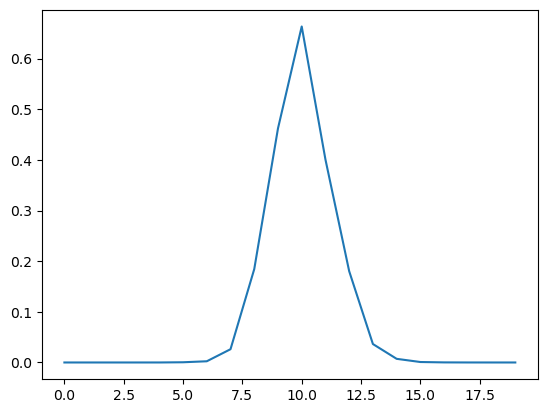

In [10]:
k = 2

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(representations)

centroids = kmeans.cluster_centers_

for i in range(k):
    show_representation(centroids[i])

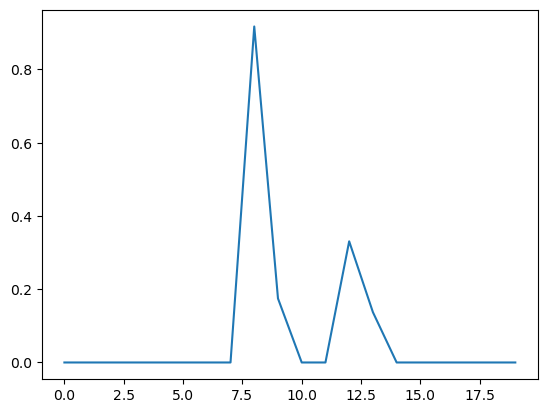

In [11]:
distances = np.array([np.linalg.norm(representations - centroid, axis=1) for centroid in centroids])

d_max = 0

for rep in representations:
    d = min([np.linalg.norm(rep - centroid) for centroid in centroids])

    if d > d_max:
        d_max = d
        far = rep

show_representation(far)